In [1]:
import numpy as np
from fdm import plot_mesh, plot_contour, Laplaciano2D, RHS

In [2]:
#
# 0       1       2       3       4       5   
# |                                       |   Nx  = 4 (nodos interiores)
# *---*---|---*---|---*---|---*---|---*---*   Nvx = 5 (volúmenes)
# |                                       |
# 0   1       2       3       4       5   6   hx = L / Nx + 1 = L / Nvx 
#
#  <----------------- L ------------------>  
#
Nx = 10
Ny = 21
Lx = 1.0
Ly = 2.0
hx = Lx / (Nx+1)
hy = Ly / (Ny+1)
print(hx, hy)
print(Nx, Ny)

0.09090909090909091 0.09090909090909091
10 21


12 23


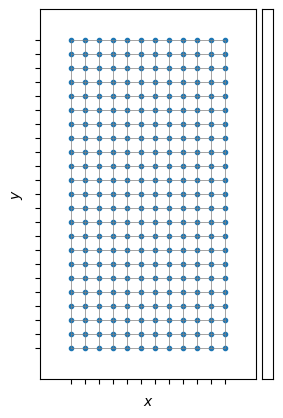

In [3]:
# Nodos totales incluyendo las fronteras
NxT = Nx + 2
NyT = Ny + 2

print(NxT, NyT)

# Coordenadas de la malla
xn = np.linspace(0,Lx,NxT)
yn = np.linspace(0,Ly,NyT)
xg, yg = np.meshgrid(xn, yn, indexing='ij', sparse=False)
plot_mesh(Lx, Ly, xg, yg)

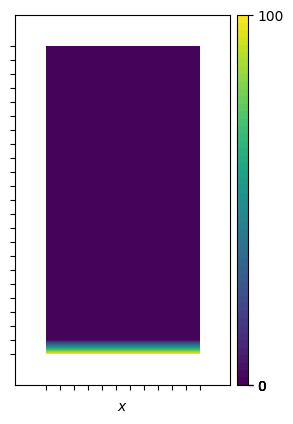

In [4]:
# Definición del campo escalar
T = np.zeros((NxT, NyT))

# Valores en las fronteras del dominio
TL = 0.0; TR = 0.0
TB = 100.0; TT = 0.0

T[0 , :] = TL # LEFT
T[-1, :] = TR # RIGHT
T[: , 0] = TB # BOTTOM
T[: ,-1] = TT # TOP

plot_contour(Lx, Ly, xg, yg, T, ticks = [0, TL, TR, TB, TT], cmap='viridis', yshared=True)

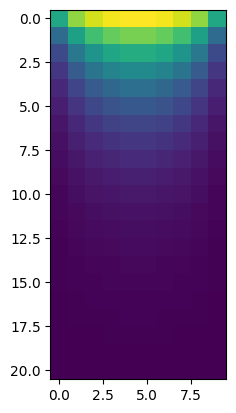

In [5]:
A = Laplaciano2D(Nx, Ny, -4)
f = RHS(Nx, Ny, T)
Tt = np.linalg.solve(A,f).reshape(Ny, Nx)

import matplotlib.pyplot as plt
plt.imshow(Tt)

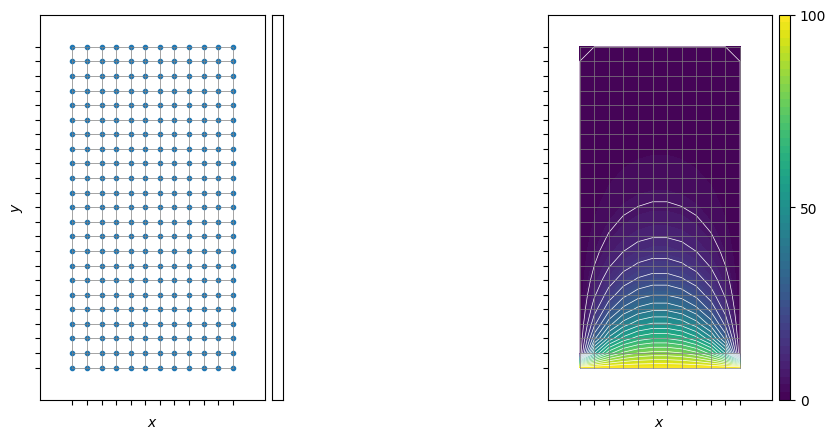

In [6]:
T[1:Nx+1,1:Ny+1] = Tt.T

fig = plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plot_mesh(Lx, Ly, xg, yg)

plt.subplot(1,2,2)
plot_contour(Lx, Ly, xg, yg, T, ticks = [0, 50, 100], 
             mesh = True, lines = 20, colors = 'white',
             cmap='viridis', yshared=True)